In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
file_path = 'data/benchmarking-data-1728992681622757100.csv'

In [3]:
df = pd.read_csv(file_path, sep=';')

In [4]:
combinations = df[['maxinc', 'maxexc']].drop_duplicates()

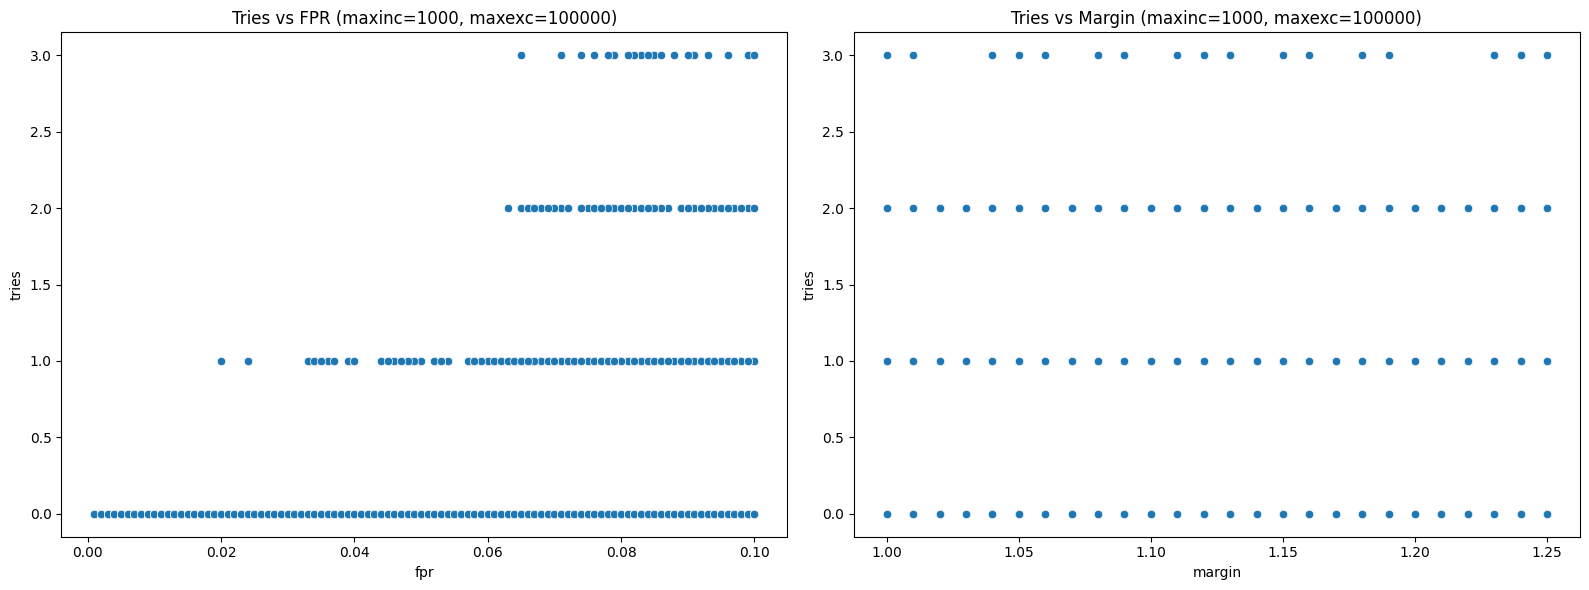

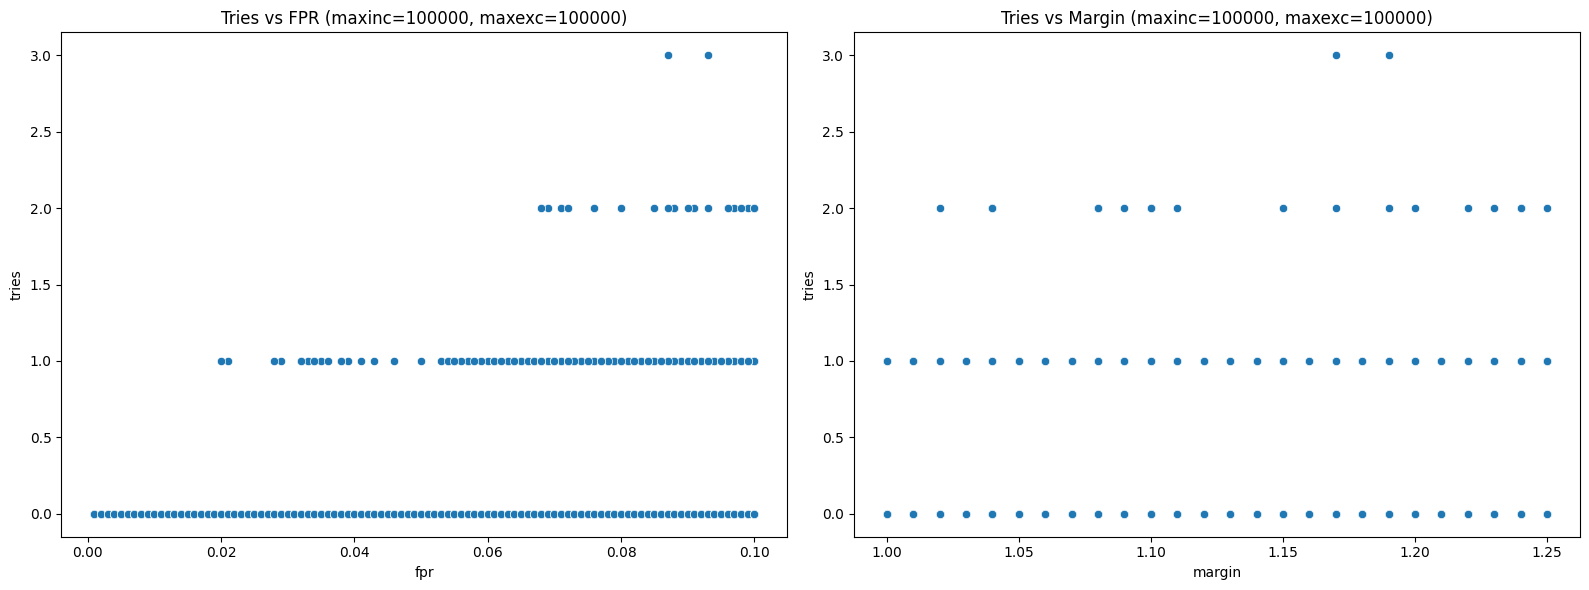

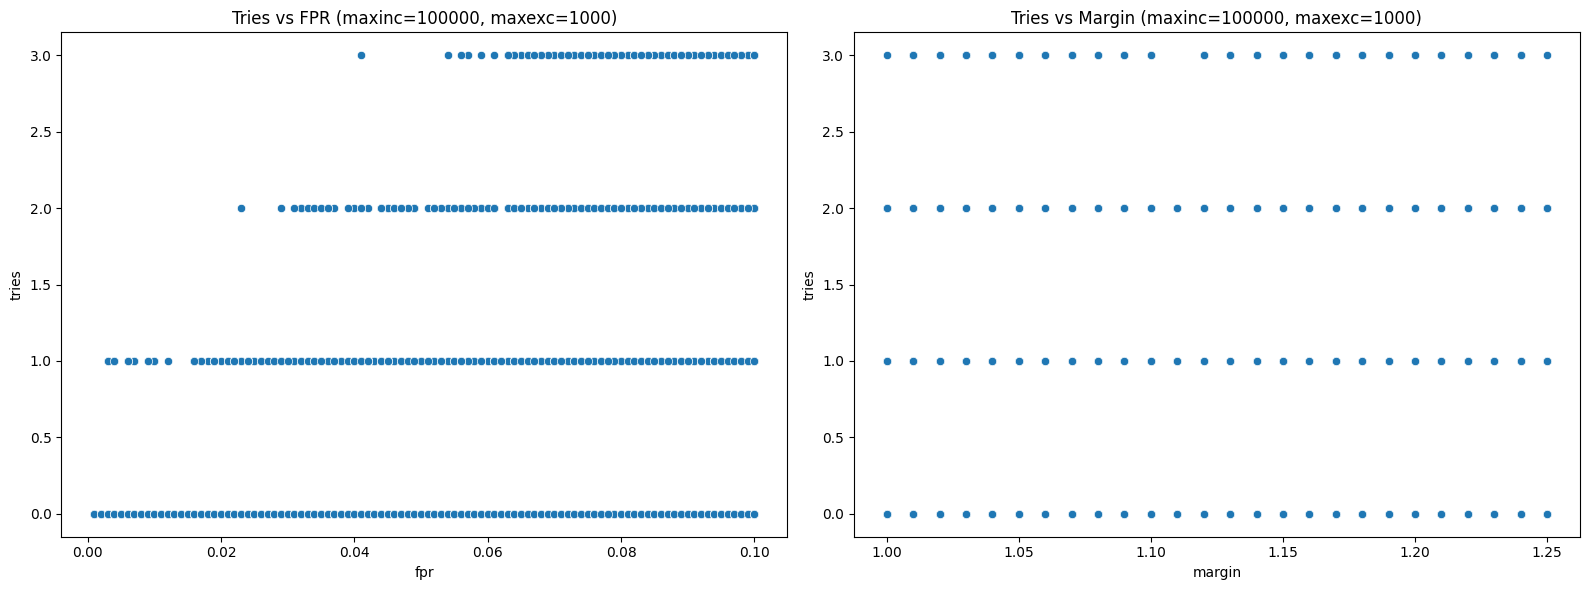

In [6]:
def analyze_combination(data, maxinc, maxexc):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    sns.scatterplot(data=data, x='fpr', y='tries', ax=ax1)
    ax1.set_title(f'Tries vs FPR (maxinc={maxinc}, maxexc={maxexc})')
    
    sns.scatterplot(data=data, x='margin', y='tries', ax=ax2)
    ax2.set_title(f'Tries vs Margin (maxinc={maxinc}, maxexc={maxexc})')
    
    plt.tight_layout()
    plt.show()

for _, row in combinations.iterrows():
    maxinc, maxexc = row['maxinc'], row['maxexc']
    data = df[(df['maxinc'] == maxinc) & (df['maxexc'] == maxexc)]
    analyze_combination(data, maxinc, maxexc)

In [8]:
def process_dataset(data):
    grouped = data.groupby(['maxinc', 'maxexc', 'margin', 'fpr']).agg({
        'total_bitstring_length': 'mean',
        'duration': lambda x: (x / (data['tries'] + 1)).mean()
    }).reset_index()
    
    grouped.columns = ['maxinc', 'maxexc', 'margin', 'fpr', 'mean_total_bitstring_length', 'mean_adjusted_duration']
    return grouped

In [9]:
result = process_dataset(df)

In [10]:
result = result.sort_values(['maxinc', 'maxexc', 'margin', 'fpr'])

In [11]:
result


maxinc  maxexc  margin    fpr  mean_total_bitstring_length  \
0       1000  100000    1.00  0.001                 17960.000000   
1       1000  100000    1.00  0.002                 16837.333333   
2       1000  100000    1.00  0.003                 16184.000000   
3       1000  100000    1.00  0.004                 16213.333333   
4       1000  100000    1.00  0.005                 16064.000000   
...      ...     ...     ...    ...                          ...   
7795  100000  100000    1.25  0.096                666482.666667   
7796  100000  100000    1.25  0.097                665680.000000   
7797  100000  100000    1.25  0.098                661802.666667   
7798  100000  100000    1.25  0.099                660533.333333   
7799  100000  100000    1.25  0.100                657997.333333   

      mean_adjusted_duration  
0                   0.410988  
1                   0.367588  
2                   0.382385  
3                   0.374923  
4                   0.382875  
...                      ...  
7795                1.276728  
7796                1.283240  
7797                1.289728  
7798                1.239604  
7799                1.318015  

[7800 rows x 6 columns]

In [12]:
combinations = result[['maxinc', 'maxexc']].drop_duplicates()

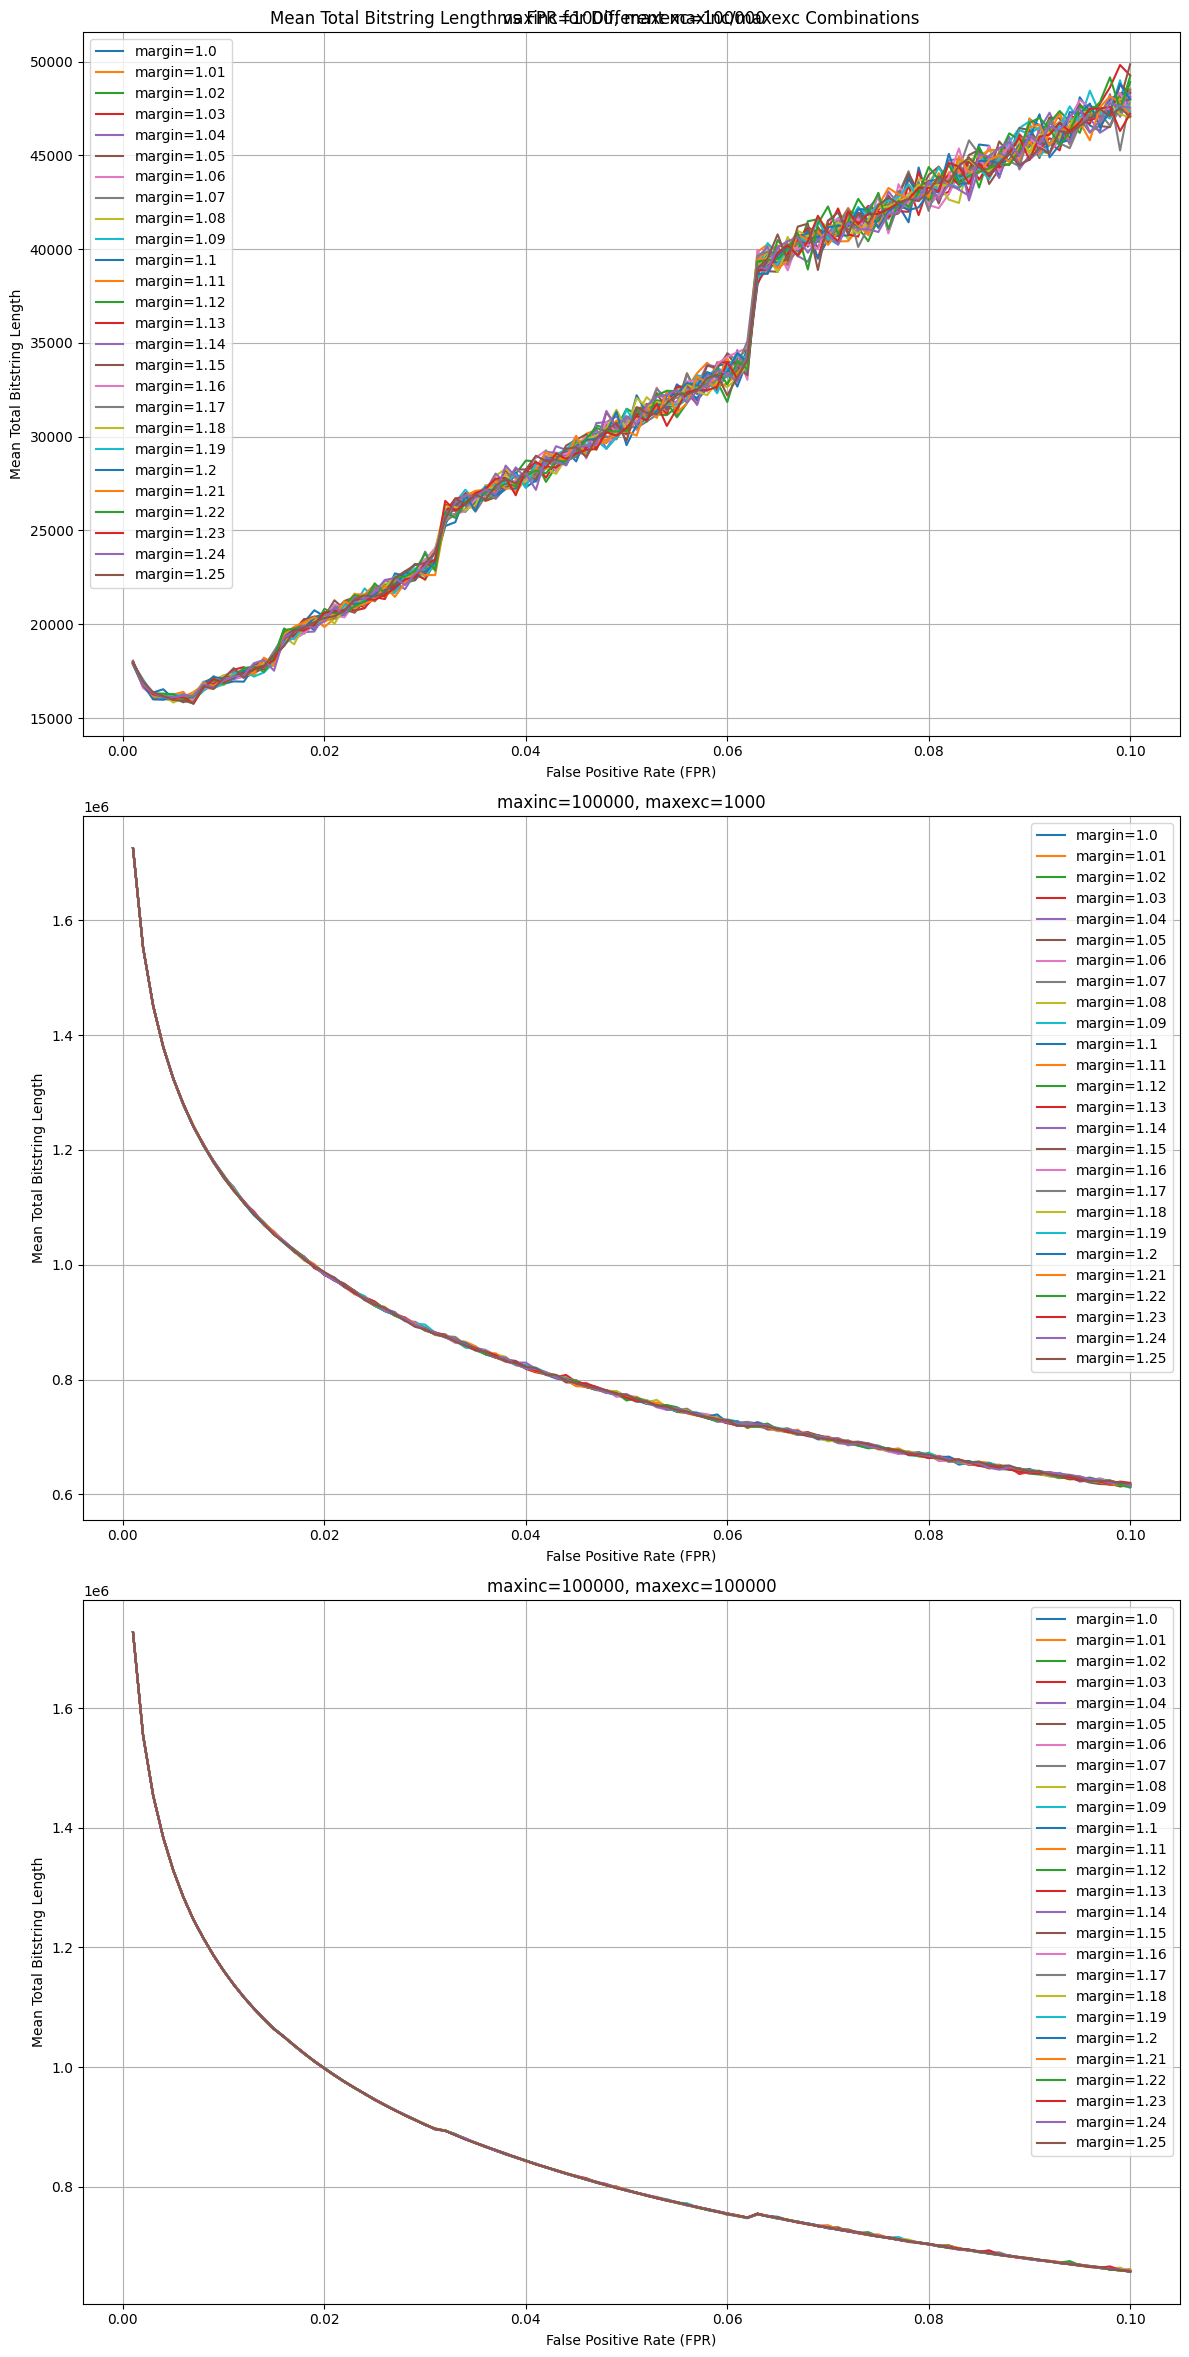

In [13]:
fig, axes = plt.subplots(3, 1, figsize=(12, 24))
fig.suptitle('Mean Total Bitstring Length vs FPR for Different maxinc/maxexc Combinations')

for i, (_, row) in enumerate(combinations.iterrows()):
    maxinc, maxexc = row['maxinc'], row['maxexc']
    data = result[(result['maxinc'] == maxinc) & (result['maxexc'] == maxexc)]
    
    for margin in data['margin'].unique():
        margin_data = data[data['margin'] == margin]
        axes[i].plot(margin_data['fpr'], margin_data['mean_total_bitstring_length'], 
                     label=f'margin={margin}')
    
    axes[i].set_xlabel('False Positive Rate (FPR)')
    axes[i].set_ylabel('Mean Total Bitstring Length')
    axes[i].set_title(f'maxinc={maxinc}, maxexc={maxexc}')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
# plt.savefig('bitstring_length_vs_fpr.png')
plt.tight_layout()
plt.show()

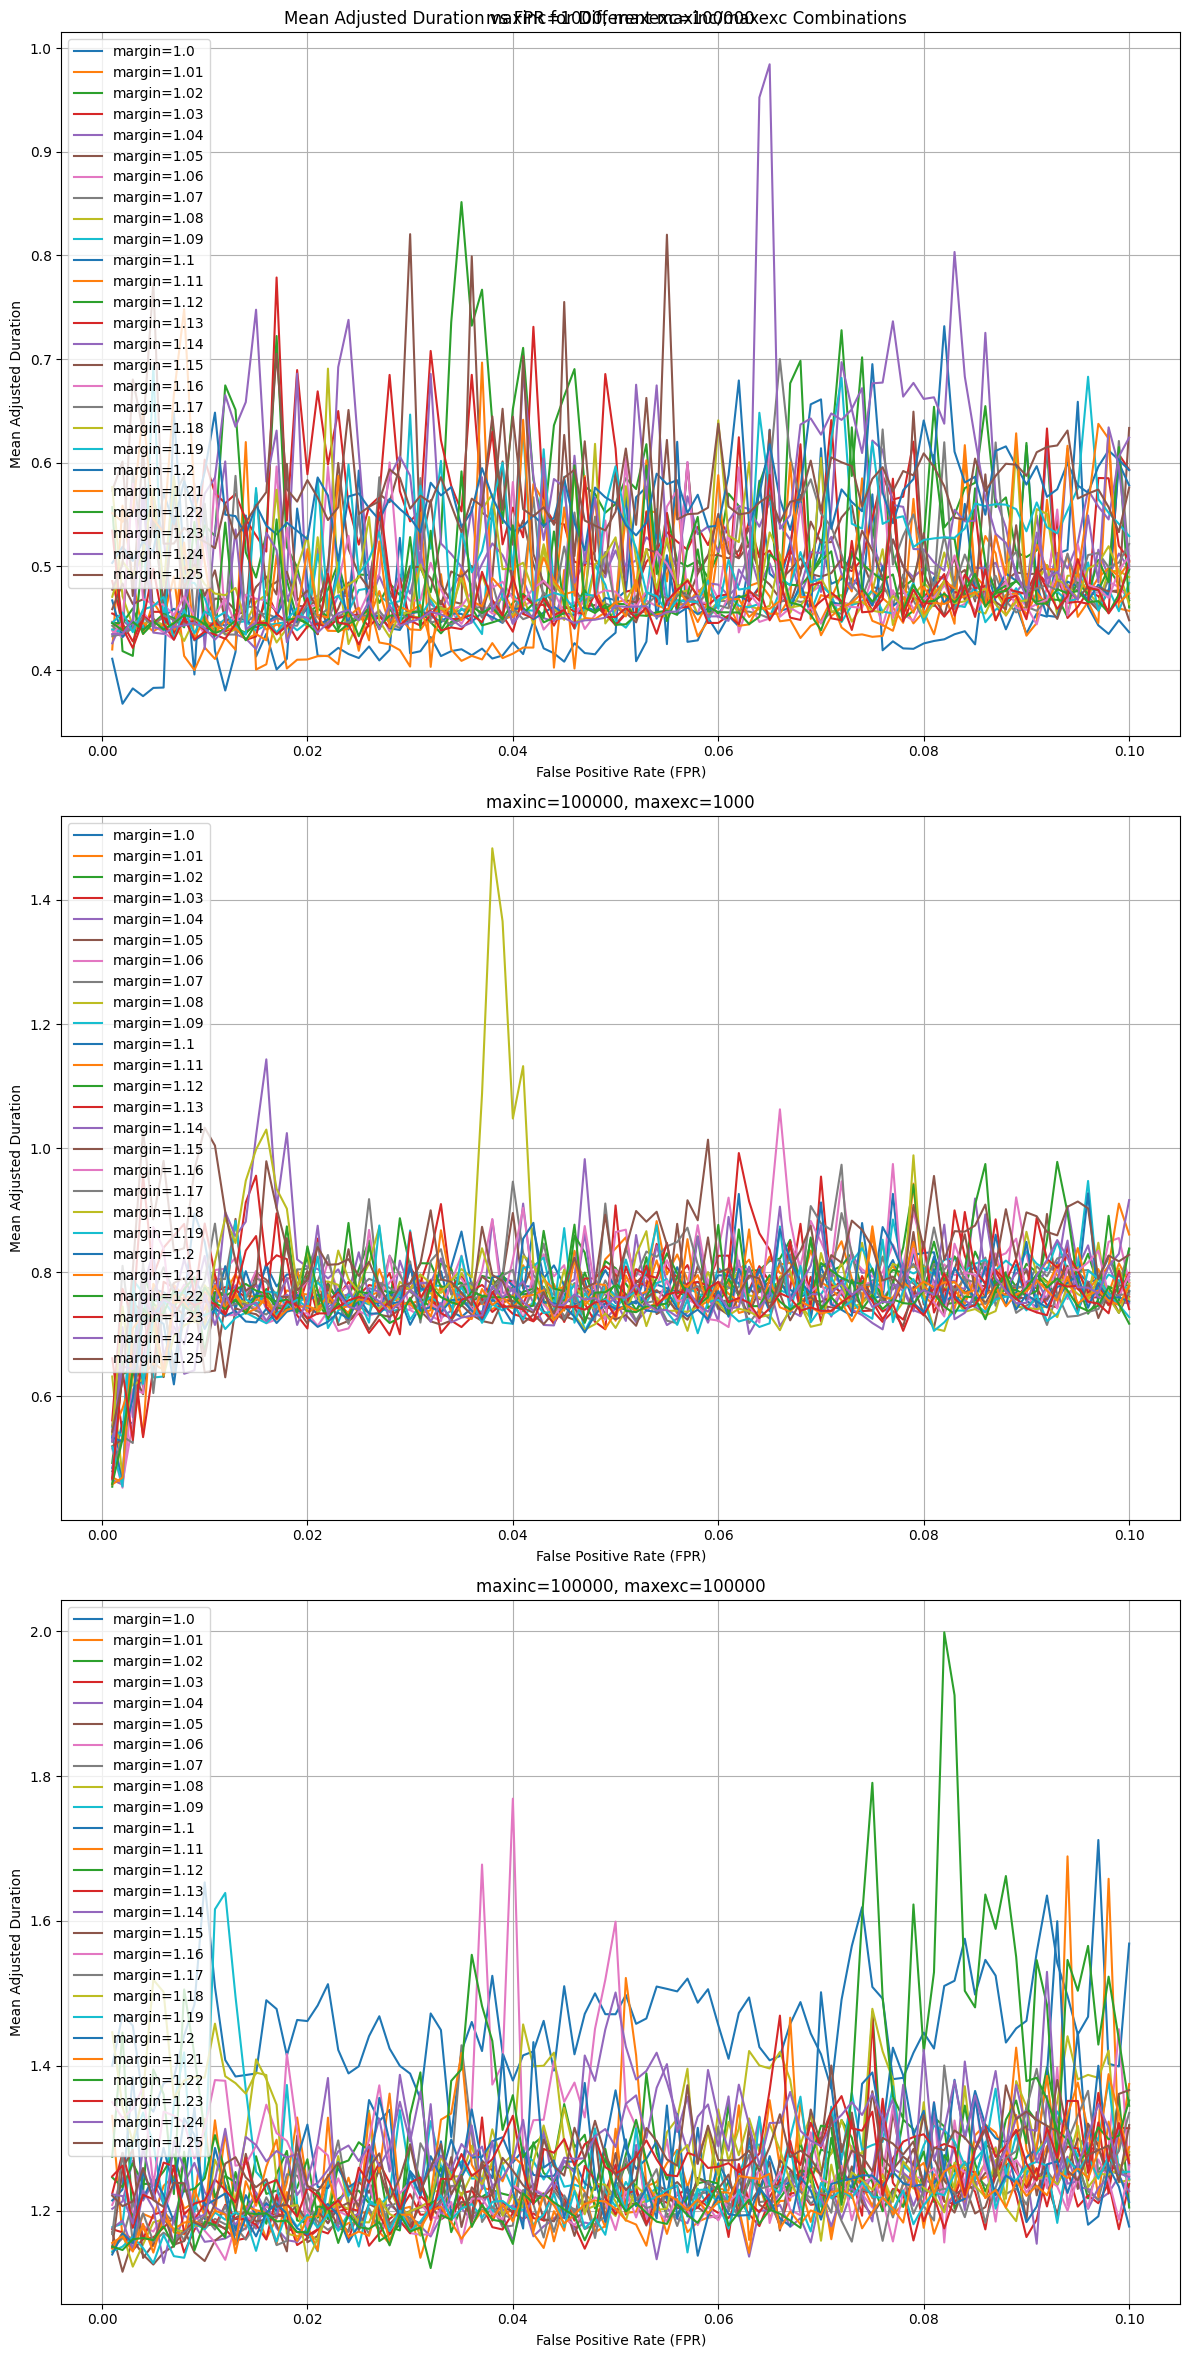

In [30]:
# Figure with three subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 24))
fig.suptitle('Mean Adjusted Duration vs FPR for Different maxinc/maxexc Combinations')

# Plot for each combination
for i, (_, row) in enumerate(combinations.iterrows()):
    maxinc, maxexc = row['maxinc'], row['maxexc']
    data = result[(result['maxinc'] == maxinc) & (result['maxexc'] == maxexc)]
    
    for margin in data['margin'].unique():
        margin_data = data[data['margin'] == margin]
        axes[i].plot(margin_data['fpr'], margin_data['mean_adjusted_duration'], 
                     label=f'margin={margin}')
    
    axes[i].set_xlabel('False Positive Rate (FPR)')
    axes[i].set_ylabel('Mean Adjusted Duration')
    axes[i].set_title(f'maxinc={maxinc}, maxexc={maxexc}')
    axes[i].legend()
    axes[i].grid(True)

plt.tight_layout()
plt.show()

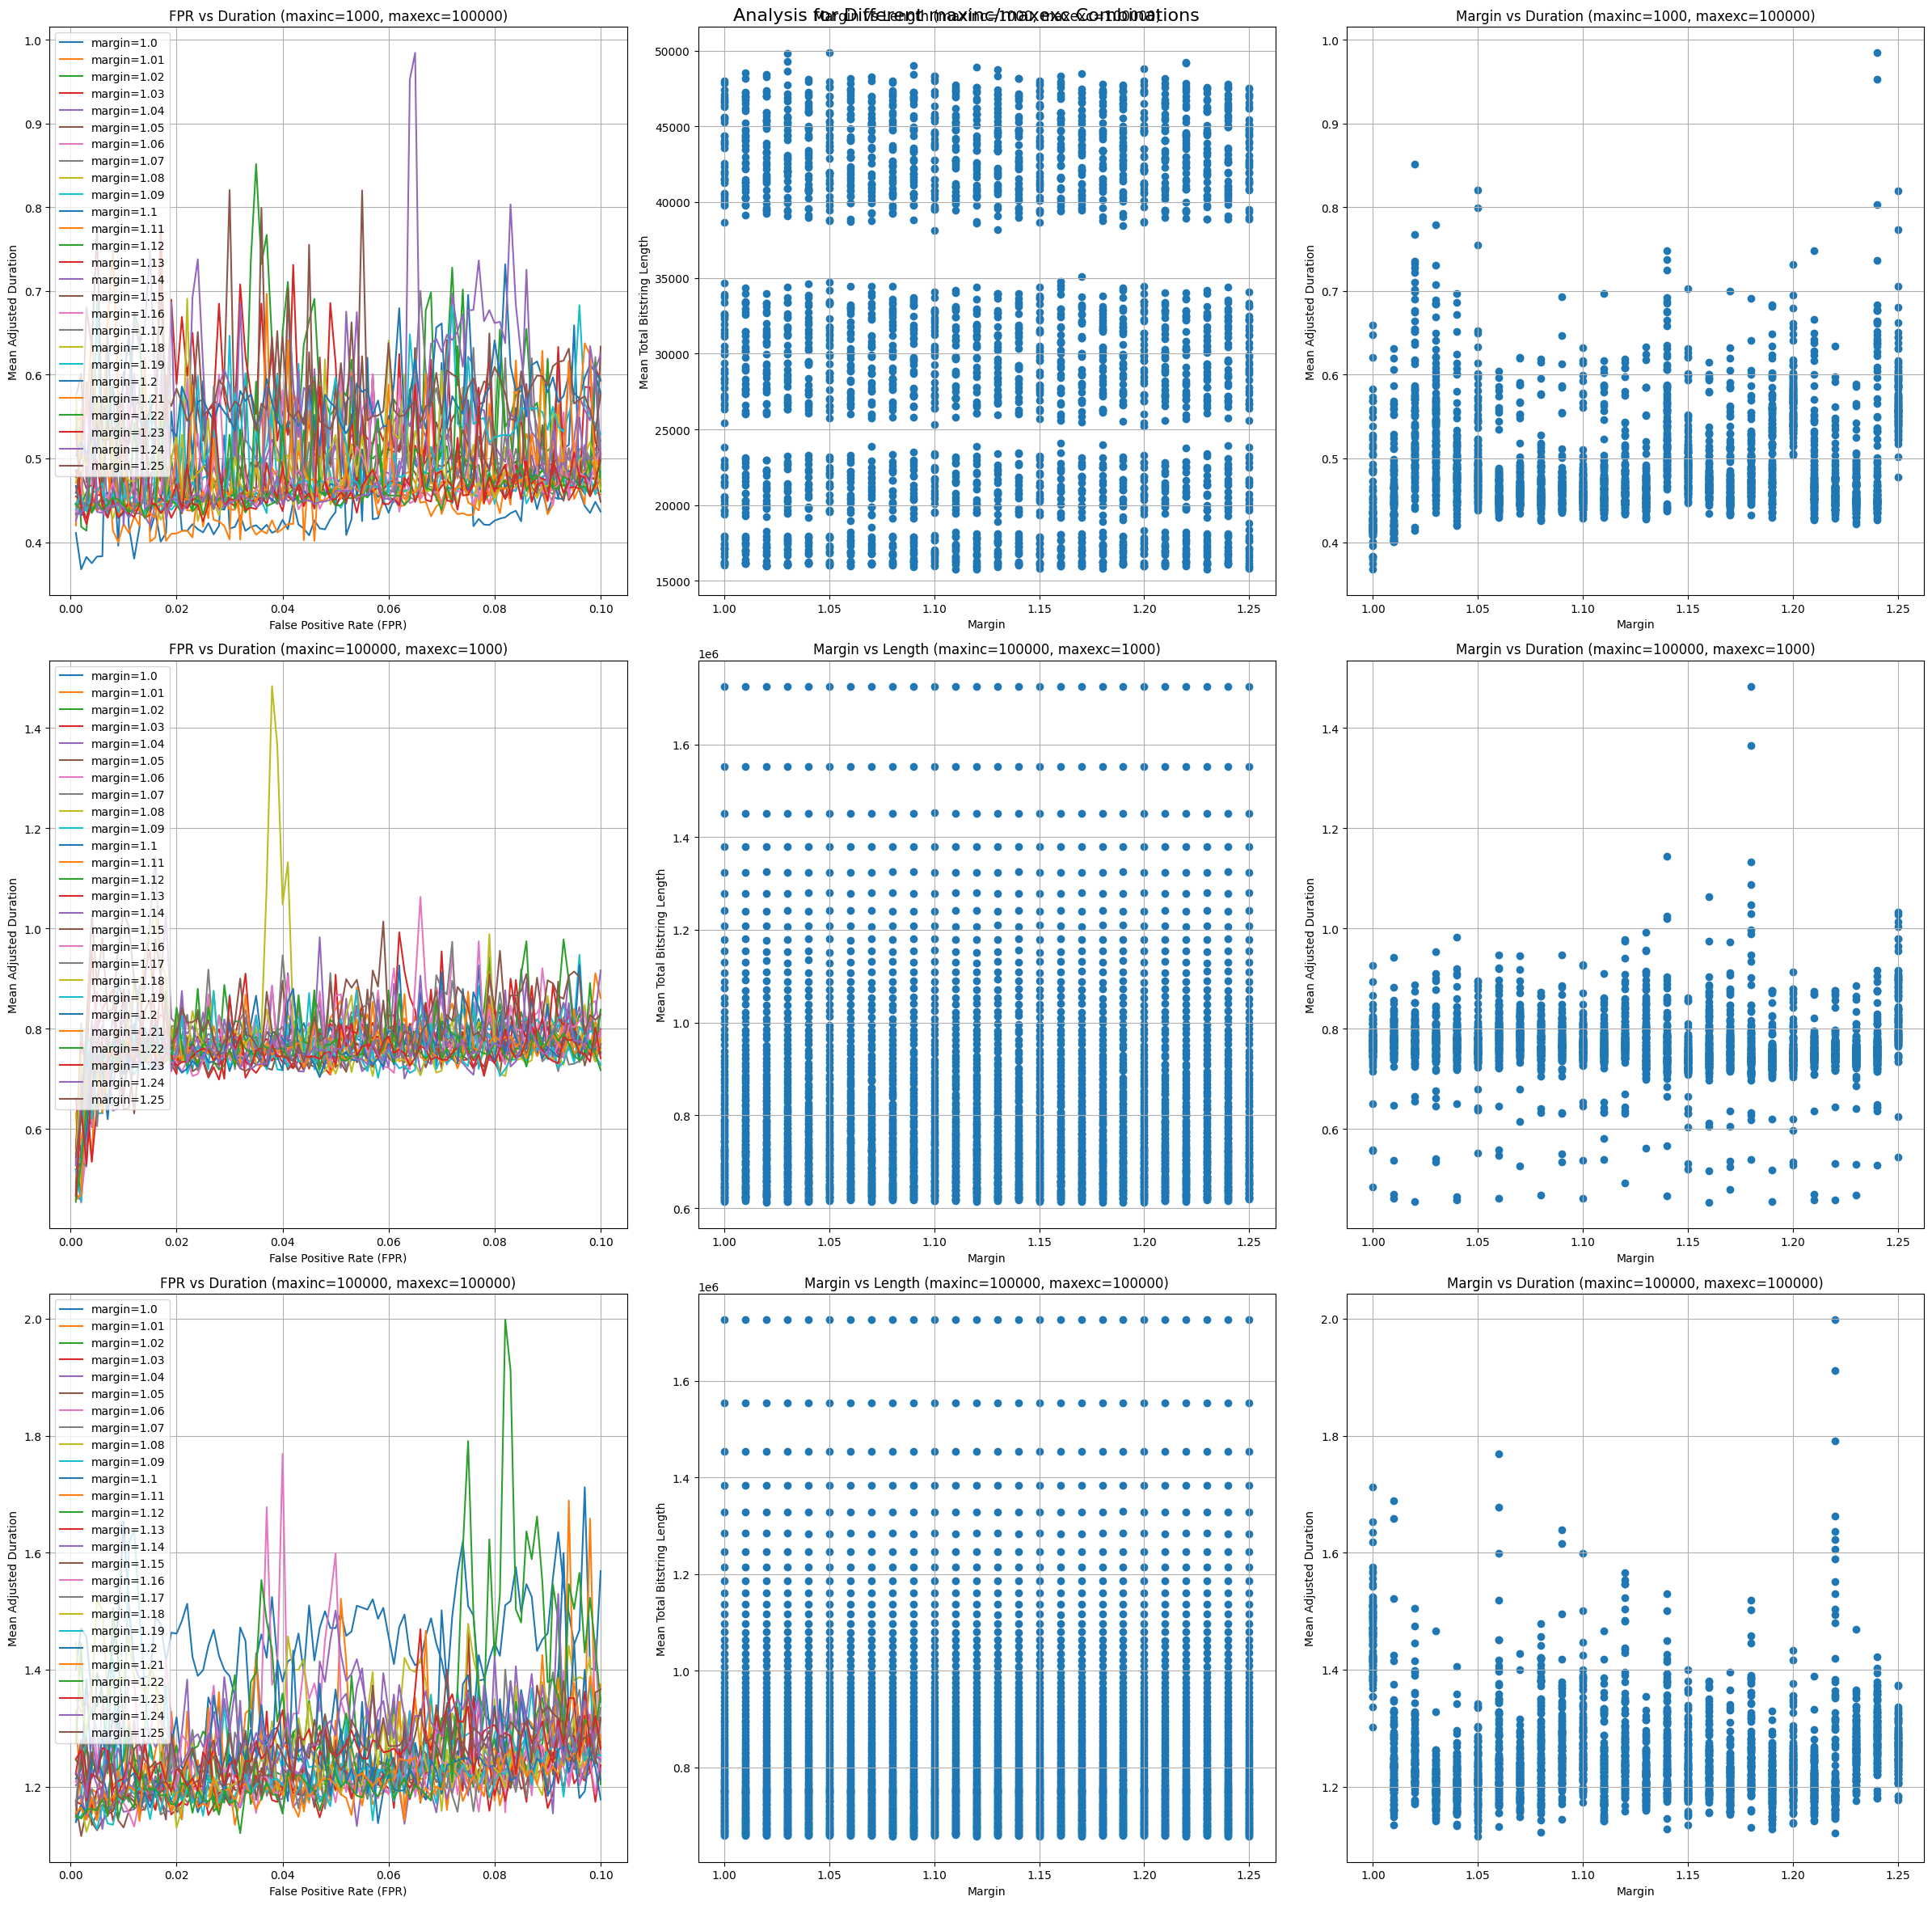

In [14]:
# Figure with nine subplots (3 rows, 3 columns)
fig, axes = plt.subplots(3, 3, figsize=(24, 24))
fig.suptitle('Analysis for Different maxinc/maxexc Combinations', fontsize=16)

# Plot for each combination
for i, (_, row) in enumerate(combinations.iterrows()):
    maxinc, maxexc = row['maxinc'], row['maxexc']
    data = result[(result['maxinc'] == maxinc) & (result['maxexc'] == maxexc)]
    
    # FPR vs Mean Adjusted Duration
    for margin in data['margin'].unique():
        margin_data = data[data['margin'] == margin]
        axes[i, 0].plot(margin_data['fpr'], margin_data['mean_adjusted_duration'], 
                        label=f'margin={margin}')
    axes[i, 0].set_xlabel('False Positive Rate (FPR)')
    axes[i, 0].set_ylabel('Mean Adjusted Duration')
    axes[i, 0].set_title(f'FPR vs Duration (maxinc={maxinc}, maxexc={maxexc})')
    axes[i, 0].legend()
    axes[i, 0].grid(True)
    
    # Margin vs Mean Total Bitstring Length
    axes[i, 1].scatter(data['margin'], data['mean_total_bitstring_length'])
    axes[i, 1].set_xlabel('Margin')
    axes[i, 1].set_ylabel('Mean Total Bitstring Length')
    axes[i, 1].set_title(f'Margin vs Length (maxinc={maxinc}, maxexc={maxexc})')
    axes[i, 1].grid(True)
    
    # Margin vs Mean Adjusted Duration
    axes[i, 2].scatter(data['margin'], data['mean_adjusted_duration'])
    axes[i, 2].set_xlabel('Margin')
    axes[i, 2].set_ylabel('Mean Adjusted Duration')
    axes[i, 2].set_title(f'Margin vs Duration (maxinc={maxinc}, maxexc={maxexc})')
    axes[i, 2].grid(True)

plt.tight_layout()
plt.show()

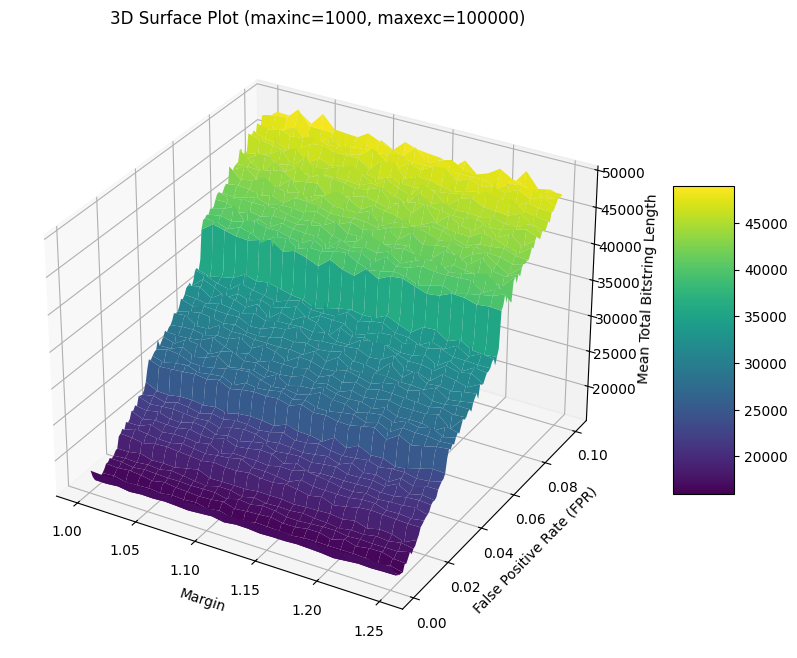

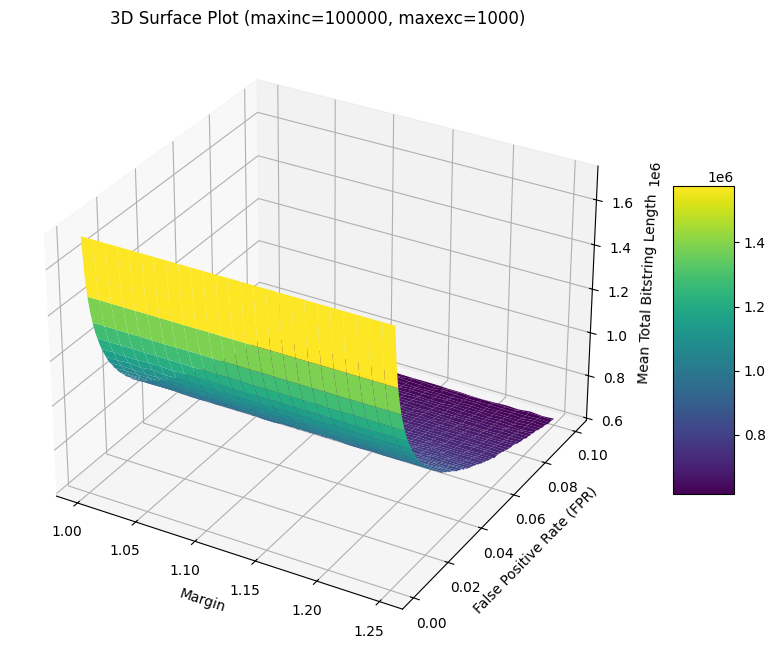

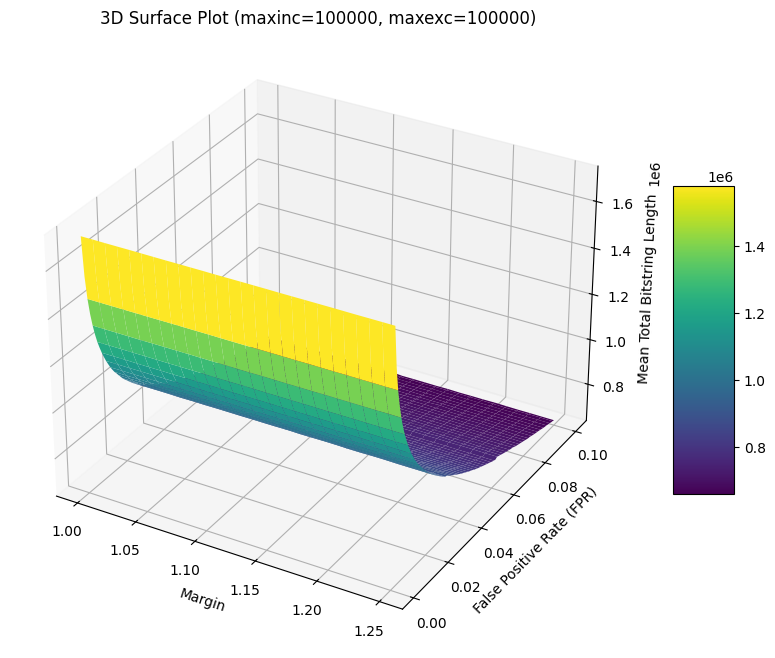

In [33]:
# Ensure you're using a backend that supports 3D plotting
%matplotlib inline

# Function to create a 3D surface plot
def plot_3d_surface(data, maxinc, maxexc):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')
    
    # Create a grid of margin and fpr values
    margin_unique = sorted(data['margin'].unique())
    fpr_unique = sorted(data['fpr'].unique())
    margin_grid, fpr_grid = np.meshgrid(margin_unique, fpr_unique)
    
    # Create a 2D array of length values
    length_grid = np.zeros(margin_grid.shape)
    for i, margin in enumerate(margin_unique):
        for j, fpr in enumerate(fpr_unique):
            length = data[(data['margin'] == margin) & (data['fpr'] == fpr)]['mean_total_bitstring_length'].values
            length_grid[j, i] = length[0] if len(length) > 0 else np.nan
    
    # Create the surface plot
    surf = ax.plot_surface(margin_grid, fpr_grid, length_grid, cmap='viridis')
    
    ax.set_xlabel('Margin')
    ax.set_ylabel('False Positive Rate (FPR)')
    ax.set_zlabel('Mean Total Bitstring Length')
    ax.set_title(f'3D Surface Plot (maxinc={maxinc}, maxexc={maxexc})')
    
    # Add a color bar
    fig.colorbar(surf, ax=ax, shrink=0.5, aspect=5)
    
    plt.show()

# Create a plot for each maxinc/maxexc combination
for _, row in combinations.iterrows():
    maxinc, maxexc = row['maxinc'], row['maxexc']
    data = result[(result['maxinc'] == maxinc) & (result['maxexc'] == maxexc)]
    plot_3d_surface(data, maxinc, maxexc)

In [26]:
filepath = "data/benchmarking-data-1728998337285243100.csv"
df = pd.read_csv(filepath, sep=';')

In [27]:
# Get unique combinations of maxinc and maxexc
combinations = df[['maxinc', 'maxexc']].drop_duplicates()

In [28]:
combinations

maxinc  maxexc
0  100000    1000

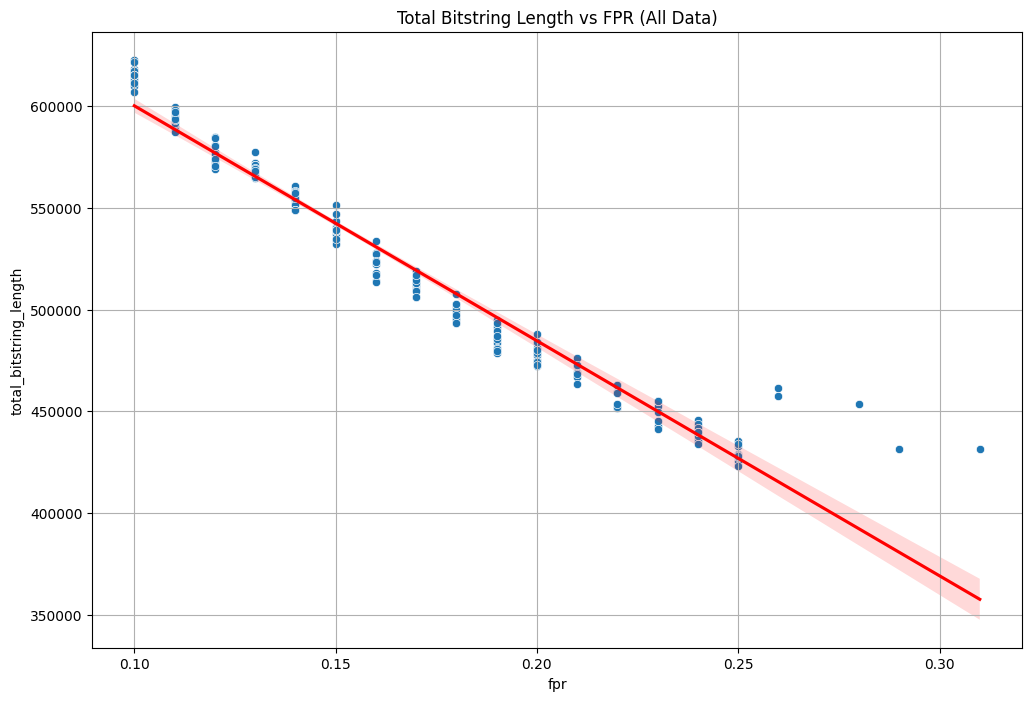

Summary Statistics:
      count           mean          std       min       25%       50%  \
fpr                                                                     
0.10   17.0  615626.352941  4316.250006  607072.0  613496.0  615424.0   
0.11   17.0  594608.470588  3647.454423  587472.0  592648.0  594936.0   
0.12   18.0  575109.333333  4831.183414  568928.0  571124.0  573884.0   
0.13   15.0  569325.866667  3250.187113  564576.0  567732.0  569080.0   
0.14   12.0  554913.333333  4073.439050  548768.0  551762.0  555008.0   
0.15   12.0  539834.000000  5483.118025  532376.0  536684.0  539028.0   
0.16   15.0  522841.066667  5440.710766  513440.0  520092.0  523344.0   
0.17   17.0  512054.117647  3559.173533  505944.0  509632.0  511936.0   
0.18   16.0  498896.500000  3870.700023  493192.0  496610.0  499724.0   
0.19   12.0  485914.000000  5484.621409  478880.0  481040.0  485360.0   
0.20   14.0  478796.571429  4428.092378  472264.0  475884.0  478368.0   
0.21    8.0  469767.000000  403

In [32]:
# Create the plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='fpr', y='total_bitstring_length')
plt.title('Total Bitstring Length vs FPR (All Data)')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('Total Bitstring Length')
plt.grid(True)

# Add a trend line
sns.regplot(data=df, x='fpr', y='total_bitstring_length', scatter=False, color='red')

plt.show()

# Print summary statistics
print("Summary Statistics:")
print(df.groupby('fpr')['total_bitstring_length'].describe())

# Calculate overall correlation
correlation = df['fpr'].corr(df['total_bitstring_length'])
print(f"\nOverall correlation between FPR and Total Bitstring Length: {correlation:.4f}")

In [30]:
fprs = np.arange(0.10, 1.01, 0.01).round(2)

In [31]:
print(fprs)

[0.1  0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23
 0.24 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37
 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51
 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65
 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79
 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93
 0.94 0.95 0.96 0.97 0.98 0.99 1.  ]
